### Áî®Ê≠ªÂÇ∑‰∫∫Êï∏ÂÅö OLS Ê®°Âûã

In [2]:
import pandas as pd
import numpy as np

# ËÆÄÂèñ A1 Ëàá A2 Ë≥áÊñô
high = pd.read_csv("high_popularity_spotify_data.csv")
low = pd.read_csv("low_popularity_spotify_data.csv")


df = pd.concat([high, low], ignore_index=True)
df.head()

#df['playlist_genre'].value_counts()


energy    tempo  danceability playlist_genre  loudness  liveness  valence  \
0   0.592  157.969         0.521            pop    -7.777     0.122    0.535   
1   0.507  104.978         0.747            pop   -10.171     0.117    0.438   
2   0.808  108.548         0.554            pop    -4.169     0.159    0.372   
3   0.910  112.966         0.670            pop    -4.070     0.304    0.786   
4   0.783  149.027         0.777            pop    -4.477     0.355    0.939   

            track_artist  time_signature  speechiness  ...  instrumentalness  \
0  Lady Gaga, Bruno Mars             3.0       0.0304  ...            0.0000   
1          Billie Eilish             4.0       0.0358  ...            0.0608   
2          Gracie Abrams             4.0       0.0368  ...            0.0000   
3      Sabrina Carpenter             4.0       0.0634  ...            0.0000   
4       ROS√â, Bruno Mars             4.0       0.2600  ...            0.0000   

           track_album_id mode  key duration_ms acousticness  \
0  10FLjwfpbxLmW8c25Xyc2N  0.0  6.0    251668.0       0.3080   
1  7aJuG4TFXa2hmE4z1yxc3n  1.0  2.0    210373.0       0.2000   
2  0hBRqPYPXhr1RkTDG3n4Mk  1.0  1.0    166300.0       0.2140   
3  4B4Elma4nNDUyl6D5PvQkj  0.0  0.0    157280.0       0.0939   
4  2IYQwwgxgOIn7t3iF6ufFD  0.0  0.0    169917.0       0.0283   

                       id playlist_subgenre            type  \
0  2plbrEY59IikOBgBGLjaoe        mainstream  audio_features   
1  6dOtVTDdiauQNBQEDOtlAB        mainstream  audio_features   
2  7ne4VBA60CxGM75vw0EYad        mainstream  audio_features   
3  1d7Ptw3qYcfpdLNL5REhtJ        mainstream  audio_features   
4  5vNRhkKd0yEAg8suGBpjeY        mainstream  audio_features   

              playlist_id  
0  37i9dQZF1DXcBWIGoYBM5M  
1  37i9dQZF1DXcBWIGoYBM5M  
2  37i9dQZF1DXcBWIGoYBM5M  
3  37i9dQZF1DXcBWIGoYBM5M  
4  37i9dQZF1DXcBWIGoYBM5M  

[5 rows x 29 columns]

In [3]:
import statsmodels.formula.api as smf

df = pd.concat([high, low], ignore_index=True)
df['playlist_genre'] = df['playlist_genre'].replace('hip-hop', 'hiphop')
df['playlist_genre'] = df['playlist_genre'].replace('j-pop', 'jpop')
df['playlist_genre'] = df['playlist_genre'].replace('k-pop', 'kpop')
df['playlist_genre'] = df['playlist_genre'].replace('r&b', 'r8b')

drop_cols = ['track_artist', 'time_signature', 'track_href', 'uri', 'track_album_name', 'playlist_name', 'analysis_url', 'track_id', 'track_name', 'track_album_release_date', 'track_album_id', 'id', 'playlist_subgenre', 'type', 'playlist_id']

df = df.drop(columns=drop_cols)

# Âêà‰Ωµ rare genres ÁÇ∫ "ÂÖ∂‰ªñ"
threshold = 50  # Â∞ëÊñº 50 ÂâáË¶ñÁÇ∫ rare
vc = df['playlist_genre'].value_counts()
rare = vc[vc < threshold].index
df['playlist_genre_clean'] = df['playlist_genre'].replace(rare, 'ÂÖ∂‰ªñ')

genre_dummies = pd.get_dummies(df["playlist_genre"], prefix="genre", drop_first=True)

# Âª∫Á´ãÊ®°ÂûãË≥áÊñôÈõÜÔºåÂåÖÂê´ÊâÄÊúâÊ¨Ñ‰ΩçÔºàÂéªÈô§ÁõÆÊ®ôËÆäÊï∏Ëàá genre_dummies ÈáçË§áÊ¨Ñ‰ΩçÔºâ
exclude_cols = ['track_popularity', 'playlist_genre']  # track_popularity ÊòØÁõÆÊ®ôËÆäÊï∏Ôºåplaylist_genre Â∑≤Á∂ì dummy
predictors = [col for col in df.columns if col not in exclude_cols]
df_model = pd.concat([df[predictors], genre_dummies], axis=1)

# Ëá™ÂãïÁî¢ÁîüÂÖ¨Âºè
formula = "track_popularity ~ " + " + ".join(df_model.columns)

# Âª∫Ê®°
model = smf.ols(formula, data=pd.concat([df["track_popularity"], df_model], axis=1))
result = model.fit()

# È°ØÁ§∫ÁµêÊûú
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:       track_popularity   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     45.90
Date:                Tue, 27 May 2025   Prob (F-statistic):               0.00
Time:                        14:01:23   Log-Likelihood:                -20398.
No. Observations:                4830   AIC:                         4.089e+04
Df Residuals:                    4783   BIC:                         4.120e+04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

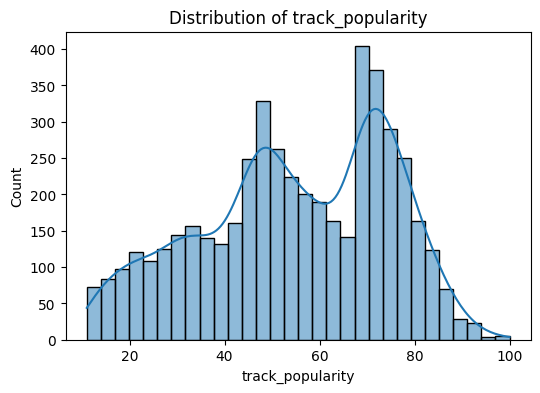

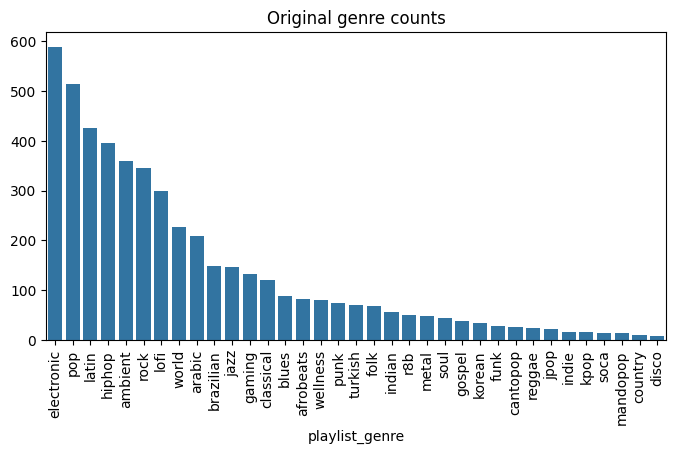

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20854 (\N{CJK UNIFIED IDEOGRAPH-5176}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20182 (\N{CJK UNIFIED IDEOGRAPH-4ED6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# 2. ÊïòËø∞ÊÄßÁµ±Ë®à & Ë¶ñË¶∫Âåñ
# 2.1 ÁõÆÊ®ôÂàÜÂ∏É
plt.figure(figsize=(6,4))
sns.histplot(df['track_popularity'], bins=30, kde=True)
plt.title("Distribution of track_popularity")
plt.show()

# 2.2 clean genre Ê¨°Êï∏
plt.figure(figsize=(8,4))
sns.barplot(x=vc.index, y=vc.values)
plt.xticks(rotation=90)
plt.title("Original genre counts")
plt.show()

plt.figure(figsize=(8,4))
sns.countplot(data=df, x='playlist_genre_clean',
              order=df['playlist_genre_clean'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Collapsed genre counts")
plt.show()

# 2.3 Êï∏ÂÄºËÆäÊï∏Áõ∏Èóú‰øÇÊï∏ÁÜ±Âúñ
num_cols = ['danceability','energy','valence','tempo','loudness',
            'speechiness','acousticness','instrumentalness','liveness','duration_ms']
corr = df[num_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="vlag", center=0)
plt.title("Numeric Feature Correlation")
plt.show()

In [ ]:
from itertools import combinations

def backward_selection(data, response, threshold_in=0.05):
    initial_features = []
    remaining_features = list(data.columns)
    remaining_features.remove(response)

    while True:
        changed = False
        worst_pval = 0
        worst_candidate = None

        for candidate in remaining_features:
            formula = "{} ~ {}".format(response, ' + '.join(remaining_features))
            model = smf.ols(formula, data).fit()
            pval = model.pvalues[candidate]
            if pval > threshold_in and pval > worst_pval:
                worst_candidate = candidate
                worst_pval = pval

        if worst_candidate is not None:
            remaining_features.remove(worst_candidate)
            changed = True
            print(f"{worst_candidate} is removed with p-value {worst_pval:.4f}.")
            print()

        if not changed:
            print('No variable is removed. Stop.')
            break

    formula = "{} ~ {}".format(response, ' + '.join(remaining_features))
    model = smf.ols(formula, data).fit()
    return model



## Backward Stepwise Regression
### ÊáâËÆäÊï∏ÁÇ∫ track_popularity


In [ ]:

df = pd.concat([high, low], ignore_index=True)
df['playlist_genre'] = df['playlist_genre'].replace('hip-hop', 'hiphop')
df['playlist_genre'] = df['playlist_genre'].replace('j-pop', 'jpop')
df['playlist_genre'] = df['playlist_genre'].replace('k-pop', 'kpop')
df['playlist_genre'] = df['playlist_genre'].replace('r&b', 'r8b')

drop_cols = ['track_artist', 'time_signature', 'track_href', 'uri', 'track_album_name', 'playlist_name', 'analysis_url', 'track_id', 'track_name', 'track_album_release_date', 'track_album_id', 'id', 'playlist_subgenre', 'type', 'playlist_id']

df = df.drop(columns=drop_cols)
genre_dummies = pd.get_dummies(df["playlist_genre"], prefix="genre", drop_first=True).astype(int)

# Âª∫Á´ãÊ®°ÂûãË≥áÊñôÈõÜÔºåÂåÖÂê´ÊâÄÊúâÊ¨Ñ‰ΩçÔºàÂéªÈô§ÁõÆÊ®ôËÆäÊï∏Ëàá genre_dummies ÈáçË§áÊ¨Ñ‰ΩçÔºâ
exclude_cols = ['playlist_genre']  # track_popularity ÊòØÁõÆÊ®ôËÆäÊï∏Ôºåplaylist_genre Â∑≤Á∂ì dummy
predictors = [col for col in df.columns if col not in exclude_cols]

data = pd.concat([
    df[predictors],
    genre_dummies[[col for col in genre_dummies.columns if col.startswith('genre_')]]
], axis=1)

# print(data.shape)
# display(data['genre_ambient'].value_counts())
result = backward_selection(data, response = 'track_popularity')
print(result.summary())

liveness is removed with p-value 0.9714.

genre_soul is removed with p-value 0.8937.

genre_mandopop is removed with p-value 0.7334.

genre_lofi is removed with p-value 0.7634.

genre_ambient is removed with p-value 0.6624.

duration_ms is removed with p-value 0.6585.

mode is removed with p-value 0.5505.

acousticness is removed with p-value 0.4246.

genre_latin is removed with p-value 0.3427.

genre_reggae is removed with p-value 0.3427.

genre_country is removed with p-value 0.2861.

tempo is removed with p-value 0.2366.

energy is removed with p-value 0.1674.

genre_jazz is removed with p-value 0.1677.

genre_electronic is removed with p-value 0.0753.

genre_indie is removed with p-value 0.0577.

No variable is removed. Stop.
                            OLS Regression Results                            
Dep. Variable:       track_popularity   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.300
Method:                

### üîç ÊÆòÂ∑ÆÂúñËßÄÂØüÈáçÈªû
#### ‚úÖ Ê∞¥Âπ≥Ê©òÁ∑öÊòØÊÆòÂ∑ÆÂπ≥ÂùáÁ∑öÔºà0Ôºâ
Ê≠£Â∏∏ÊÉÖÊ≥Å‰∏ãÔºåÈªûÊáâÂ§ßËá¥ÂàÜÂ∏ÉÂú®Ê©òÁ∑ö‰∏ä‰∏ãÔºåÁÑ°ÊòéÈ°ØÂΩ¢ÁãÄ„ÄÇ

#### ‚ùå Âúñ‰∏≠ÂïèÈ°å
ÊºèÊñóÂΩ¢ÔºàÂè≥ÂÅ¥ËºÉÁ™ÑÔºâÔºö

Ë°®Á§∫ Áï∞Ë≥™ËÆäÁï∞ÔºàheteroscedasticityÔºâÔºåÈ†êÊ∏¨ÂÄºË∂äÂ§ßÊôÇÊÆòÂ∑ÆËÆäÁï∞Ë∂äÂ∞èÔºåÈÄôÈÅïÂèç‰∫ÜËø¥Ê≠∏ÂàÜÊûêÁöÑÂü∫Êú¨ÂÅáË®≠ÔºàÊÆòÂ∑ÆËÆäÁï∞ÊáâË©≤‰∏ÄËá¥Ôºâ„ÄÇ

ÊÑèÂë≥ËëóÊ®°ÂûãÂ∞çÊñº‰∏çÂêåÈ†êÊ∏¨ÂÄºÁöÑËß£ÈáãÂäõ‰∏ç‰∏ÄËá¥ÔºåÂèØËÉΩÂú®‰∏≠‰ΩéÈ†êÊ∏¨ÂÄºÊôÇÂ§±Ê∫ñ„ÄÇ

ÈùûÈö®Ê©üÂàÜÂ∏ÉÔºö

Ê≠£Â∏∏ÁöÑÊÆòÂ∑ÆÂúñÊáâÂëàÁèæÁÑ°Ë¶èÂæãÁöÑÈõ≤ÁãÄÂàÜÂ∏ÉÔºå‰ΩÜÈÄôÂºµÂúñÂëàÁèæÊüêÁ®ÆÈåêÂΩ¢ÔºåÂèØËÉΩ‰ª£Ë°®Ê®°ÂûãÂΩ¢ÂºèÈåØË™§Ôºà‰æãÂ¶ÇÂ∞ë‰∫ÜÈùûÁ∑öÊÄßÈ†ÖÔºâ„ÄÇ

Text(0, 0.5, 'Standardized Residuals of track popularity')

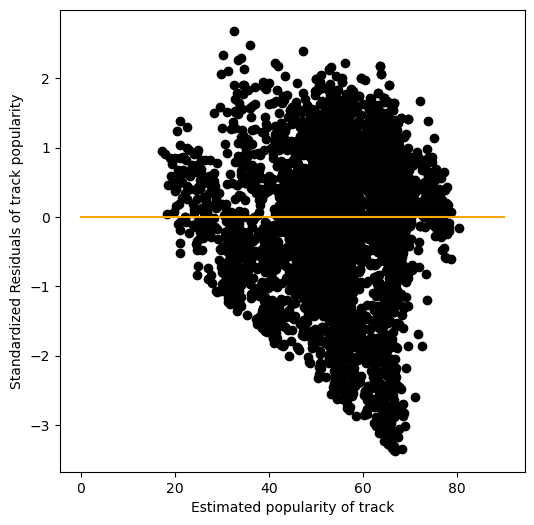

In [ ]:
import matplotlib.pyplot as plt

influence = result.get_influence()
residuals = result.resid
standardized_residuals = influence.resid_studentized_internal
estimated_values = result.fittedvalues
plt.figure(figsize = (6, 6))

plt.plot(estimated_values, standardized_residuals, 'o', color = 'black')
plt.plot([0, 90], [0, 0], color = 'orange')

plt.xlabel('Estimated popularity of track')
plt.ylabel('Standardized Residuals of track popularity')

Text(0, 0.5, 'Frequency')

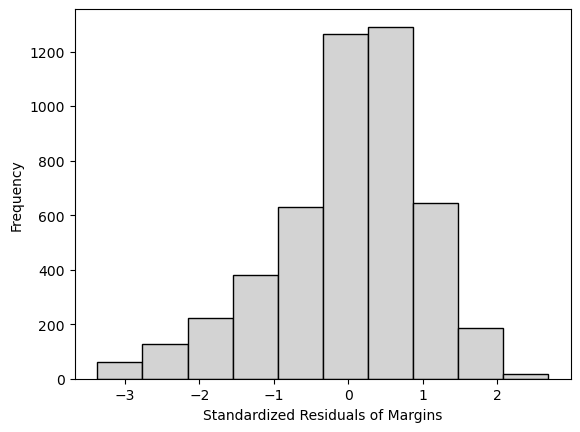

In [ ]:
plt.hist(standardized_residuals, facecolor = 'lightgrey', edgecolor = 'black')
plt.xlabel('Standardized Residuals of Margins')
plt.ylabel('Frequency')

### ÂõõÈ†ÖÊÆòÂ∑ÆÂàÜÊûê

#### The model: zero mean

In [ ]:
np.mean(standardized_residuals)

3.1478568147752e-05

#### The model: homoscedasticity (equal variance)

### Ëá™Â∑±Áúã

#### The model: normality

In [ ]:
import scipy.stats as scipy_stats
# Shapiro test
statistic, p_value = scipy_stats.shapiro(standardized_residuals)

print(f"Shapiro test statistic: {statistic:.4f}")
print(f"p-value: {p_value:.4f}")

Shapiro test statistic: 0.9638
p-value: 0.0000


#### The model: independent residuals

In [ ]:
# run test
from statsmodels.sandbox.stats.runs import runstest_1samp

z_stat, p_value = runstest_1samp(standardized_residuals, correction=True)

print(f"Runs test z statistic: {z_stat:.4f}")
print(f"p-value: {p_value:.4f}")

Runs test z statistic: -41.8393
p-value: 0.0000


## ‰∏âÂÄã‰∫§‰∫í‰ΩúÁî®È†Ö
ÈÄôË£°ÊàëÂÄëÂª∫Á´ã‰∫Ü‰∏âÂÄã‰∫§‰∫í‰ΩúÁî®È†ÖÔºö

- `danceability_tempo`ÔºöËàûËπàÊÄß √ó ÁØÄÂ•èÔºàdanceability √ó tempoÔºâÔºåÂèçÊò†Ê≠åÊõ≤ÁöÑËàûËπàÊÑüËàáÁØÄÂ•èÂø´ÊÖ¢ÁöÑÁ∂úÂêàÊïàÊûú„ÄÇ
- `danceability_energy`ÔºöËàûËπàÊÄß √ó ËÉΩÈáèÔºàdanceability √ó energyÔºâÔºåÁµêÂêàËàûËπàÊÑüËàáËÉΩÈáèÊÑüÔºåÊçïÊçâÂÖ©ËÄÖÂêåÊôÇÈ´òÊàñ‰ΩéÊôÇÁöÑÂΩ±Èüø„ÄÇ
- `energy_valence`ÔºöËÉΩÈáè √ó ÊÑâÊÇÖÂ∫¶Ôºàenergy √ó valenceÔºâÔºåÁî®‰æÜËßÄÂØüÈ´òËÉΩÈáè‰∏îÊÑâÊÇÖÁöÑÊ≠åÊõ≤ÊòØÂê¶ÁâπÂà•ÂèóÊ≠°Ëøé„ÄÇ

ÈÄô‰∫õ‰∫§‰∫í‰ΩúÁî®È†ÖÊúâÂä©ÊñºÊ®°ÂûãÊçïÊçâËÆäÊï∏ÈñìÈùûÁ∑öÊÄßÁöÑËÅØÂêàÊïàÊûúÔºåÊèêÂçáÈ†êÊ∏¨ËÉΩÂäõ„ÄÇ

In [ ]:
# ÂÖàÂª∫Á´ã‰∫§‰∫í‰ΩúÁî®È†Ö
data_interact = data.copy()
# 1. danceability √ó tempo
data_interact['danceability_tempo'] = data_interact['danceability'] * data_interact['tempo']
# 2. danceability √ó energy
data_interact['danceability_energy'] = data_interact['danceability'] * data_interact['energy']
# 3. energy √ó valence
data_interact['energy_valence'] = data_interact['energy'] * data_interact['valence']

# Ê∫ñÂÇô response
response = 'track_popularity'

# Â∞áÊâÄÊúâ predictorÔºàÂéüÊú¨ÁöÑ + ‰∫§‰∫í‰ΩúÁî®È†ÖÔºâÁµÑÂêà
predictors_interact = [col for col in data_interact.columns if col != response]

# Âü∑Ë°å backward selection
result_interact = backward_selection(data_interact[predictors_interact + [response]], response=response)
print(result_interact.summary())

liveness is removed with p-value 0.9624.

genre_soul is removed with p-value 0.8417.

genre_mandopop is removed with p-value 0.7422.

genre_ambient is removed with p-value 0.7773.

genre_lofi is removed with p-value 0.6791.

duration_ms is removed with p-value 0.6026.

mode is removed with p-value 0.4990.

genre_latin is removed with p-value 0.4078.

genre_reggae is removed with p-value 0.3707.

genre_country is removed with p-value 0.3557.

danceability_tempo is removed with p-value 0.3267.

acousticness is removed with p-value 0.2532.

energy_valence is removed with p-value 0.2474.

genre_jazz is removed with p-value 0.1813.

tempo is removed with p-value 0.1311.

genre_arabic is removed with p-value 0.0586.

genre_turkish is removed with p-value 0.0854.

genre_gospel is removed with p-value 0.0682.

valence is removed with p-value 0.0683.

danceability is removed with p-value 0.0540.

No variable is removed. Stop.
                            OLS Regression Results                   

Text(0, 0.5, 'Standardized Residuals of track popularity')

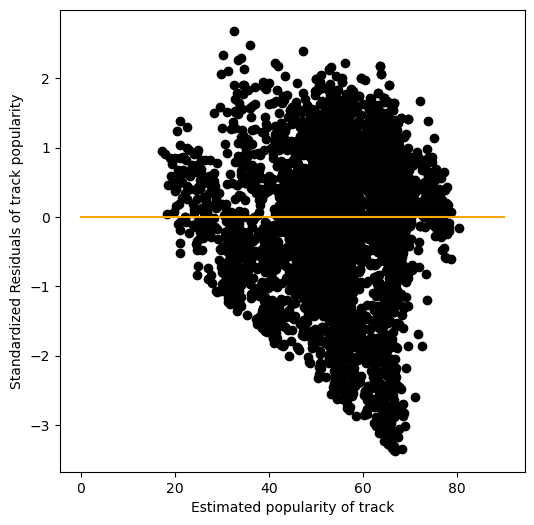

In [ ]:
import matplotlib.pyplot as plt

influence = result.get_influence()
residuals = result.resid
standardized_residuals = influence.resid_studentized_internal
estimated_values = result.fittedvalues
plt.figure(figsize = (6, 6))

plt.plot(estimated_values, standardized_residuals, 'o', color = 'black')
plt.plot([0, 90], [0, 0], color = 'orange')

plt.xlabel('Estimated popularity of track')
plt.ylabel('Standardized Residuals of track popularity')

In [ ]:
plt.hist(standardized_residuals, facecolor = 'lightgrey', edgecolor = 'black')
plt.xlabel('Standardized Residuals of Margins')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

### ÂõõÈ†ÖÊÆòÂ∑ÆÂàÜÊûê

#### The model: zero mean

In [ ]:
np.mean(standardized_residuals)

3.1478568147752e-05

#### The model: homoscedasticity (equal variance)

### Ëá™Â∑±Áúã

#### The model: normality

In [ ]:
import scipy.stats as scipy_stats
# Shapiro test
statistic, p_value = scipy_stats.shapiro(standardized_residuals)

print(f"Shapiro test statistic: {statistic:.4f}")
print(f"p-value: {p_value:.4f}")

Shapiro test statistic: 0.9638
p-value: 0.0000


#### The model: independent residuals

In [ ]:
# run test
from statsmodels.sandbox.stats.runs import runstest_1samp

z_stat, p_value = runstest_1samp(standardized_residuals, correction=True)

print(f"Runs test z statistic: {z_stat:.4f}")
print(f"p-value: {p_value:.4f}")

Runs test z statistic: -41.8393
p-value: 0.0000


## Backwards Stepwise Regression
### ÊáâËÆäÊï∏ÁÇ∫ $ \log(\text{track\_popularity}) $

In [ ]:

df = pd.concat([high, low], ignore_index=True)
df['playlist_genre'] = df['playlist_genre'].replace('hip-hop', 'hiphop')
df['playlist_genre'] = df['playlist_genre'].replace('j-pop', 'jpop')
df['playlist_genre'] = df['playlist_genre'].replace('k-pop', 'kpop')
df['playlist_genre'] = df['playlist_genre'].replace('r&b', 'r8b')

drop_cols = ['track_artist', 'time_signature', 'track_href', 'uri', 'track_album_name', 'playlist_name', 'analysis_url', 'track_id', 'track_name', 'track_album_release_date', 'track_album_id', 'id', 'playlist_subgenre', 'type', 'playlist_id']

df = df.drop(columns=drop_cols)
genre_dummies = pd.get_dummies(df["playlist_genre"], prefix="genre", drop_first=True).astype(int)

# Âª∫Á´ãÊ®°ÂûãË≥áÊñôÈõÜÔºåÂåÖÂê´ÊâÄÊúâÊ¨Ñ‰ΩçÔºàÂéªÈô§ÁõÆÊ®ôËÆäÊï∏Ëàá genre_dummies ÈáçË§áÊ¨Ñ‰ΩçÔºâ
exclude_cols = ['playlist_genre']  # track_popularity ÊòØÁõÆÊ®ôËÆäÊï∏Ôºåplaylist_genre Â∑≤Á∂ì dummy

# Â∞á track_popularity Âèñ logÔºàÂä† 1 Èò≤Ê≠¢ log(0)Ôºâ
df['track_popularity'] = np.log(df['track_popularity'])
predictors = [col for col in df.columns if col not in exclude_cols]


data = pd.concat([
    df[predictors],
    genre_dummies[[col for col in genre_dummies.columns if col.startswith('genre_')]]
], axis=1)

# print(data.shape)
# display(data['genre_ambient'].value_counts())
result = backward_selection(data, response = 'track_popularity')
print(result.summary())

genre_turkish is removed with p-value 0.9867.

genre_arabic is removed with p-value 0.9603.

liveness is removed with p-value 0.9158.

genre_gospel is removed with p-value 0.8633.

genre_country is removed with p-value 0.7872.

genre_latin is removed with p-value 0.6493.

mode is removed with p-value 0.3659.

genre_jazz is removed with p-value 0.3472.

tempo is removed with p-value 0.2499.

genre_mandopop is removed with p-value 0.2417.

duration_ms is removed with p-value 0.2172.

valence is removed with p-value 0.2273.

genre_soul is removed with p-value 0.2176.

genre_reggae is removed with p-value 0.1490.

acousticness is removed with p-value 0.1035.

energy is removed with p-value 0.1085.

genre_ambient is removed with p-value 0.0940.

speechiness is removed with p-value 0.0787.

No variable is removed. Stop.
                            OLS Regression Results                            
Dep. Variable:       track_popularity   R-squared:                       0.259
Model:          

Text(0, 0.5, 'Residuals of log(track popularity)')

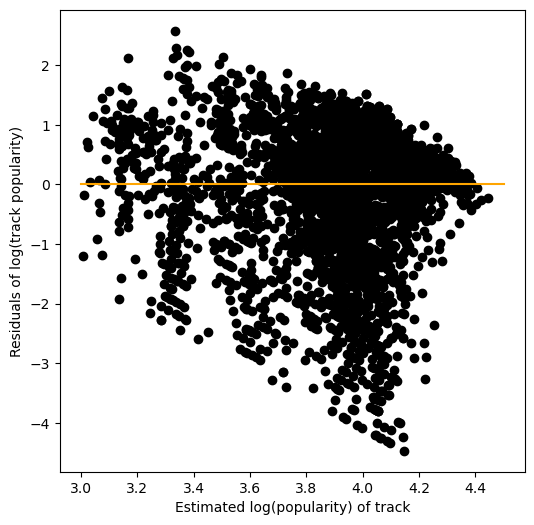

In [ ]:
influence = result.get_influence()
residuals = result.resid
standardized_residuals = influence.resid_studentized_internal
estimated_values = result.fittedvalues
plt.figure(figsize = (6, 6))

plt.plot(estimated_values, standardized_residuals, 'o', color = 'black')
plt.plot([3, 4.5], [0, 0], color = 'orange')
plt.xlabel('Estimated log(popularity) of track')
plt.ylabel('Residuals of log(track popularity)')


Text(0, 0.5, 'Frequency')

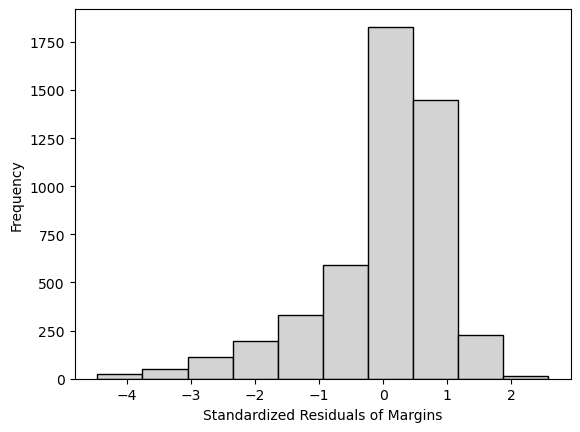

In [ ]:
plt.hist(standardized_residuals, facecolor = 'lightgrey', edgecolor = 'black')
plt.xlabel('Standardized Residuals of Margins')
plt.ylabel('Frequency')

### ÂõõÈ†ÖÊÆòÂ∑ÆÂàÜÊûê

#### The model: zero mean

In [ ]:
np.mean(standardized_residuals)

2.668231180958147e-05

#### The model: homoscedasticity (equal variance)

### Ëá™Â∑±Áúã

#### The model: normality

In [ ]:
import scipy.stats as scipy_stats
# Shapiro test
statistic, p_value = scipy_stats.shapiro(standardized_residuals)

print(f"Shapiro test statistic: {statistic:.4f}")
print(f"p-value: {p_value:.4f}")

Shapiro test statistic: 0.8934
p-value: 0.0000


#### The model: independent residuals

In [ ]:
# run test
from statsmodels.sandbox.stats.runs import runstest_1samp

z_stat, p_value = runstest_1samp(standardized_residuals, correction=True)

print(f"Runs test z statistic: {z_stat:.4f}")
print(f"p-value: {p_value:.4f}")

Runs test z statistic: -39.0126
p-value: 0.0000


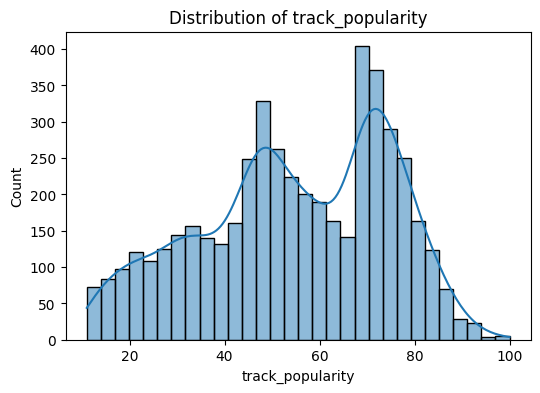

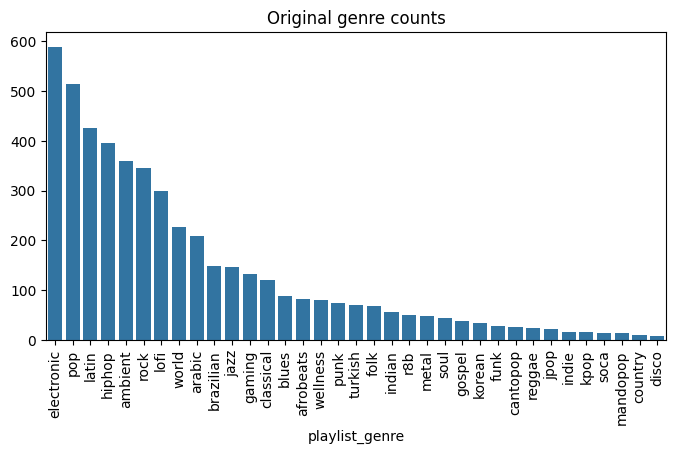

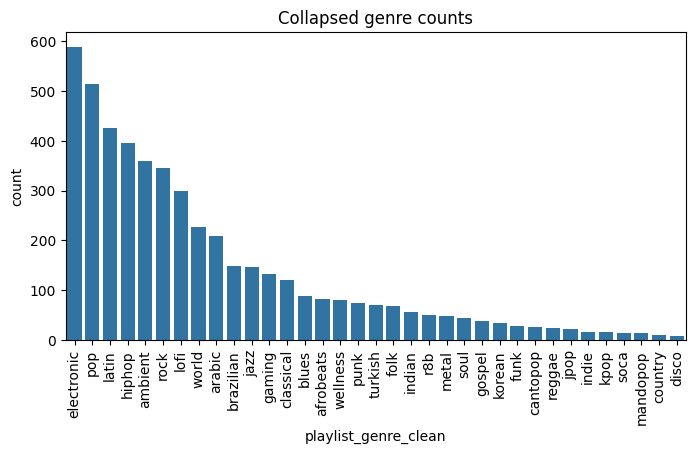

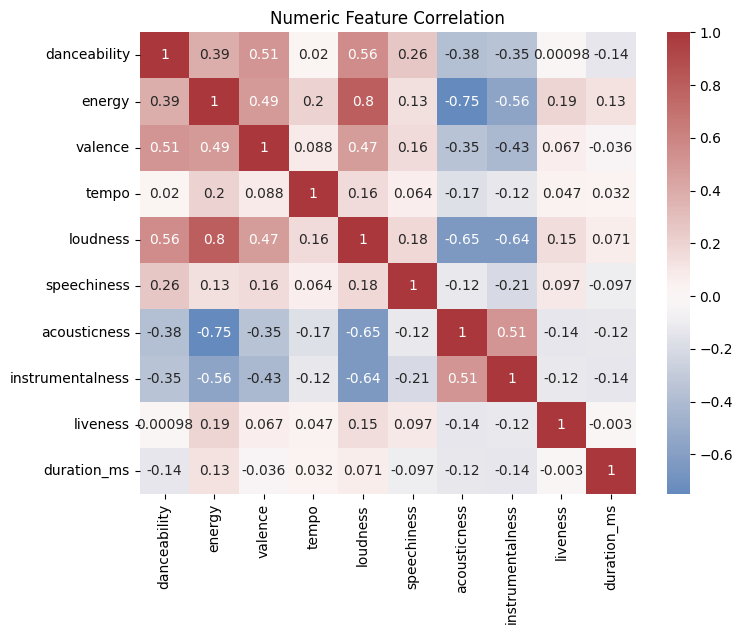

            variable         VIF
0              const  213.729823
1             energy    4.894393
2              tempo    1.070083
3       danceability    2.367063
4           loudness    5.696733
5           liveness    1.084093
6            valence    1.858022
7        speechiness    1.390445
8   instrumentalness    3.066670
9               mode    1.092595
10               key    1.030645
11       duration_ms    1.376245
12      acousticness    2.720312
13     genre_ambient    5.262329
14      genre_arabic    3.495866
15       genre_blues    2.095812
16   genre_brazilian    2.785959
17    genre_cantopop    1.356030
18   genre_classical    2.761068
19     genre_country    1.150349
20       genre_disco    1.123319
21  genre_electronic    7.487364
22        genre_folk    1.904215
23        genre_funk    1.369129
24      genre_gaming    2.638969
25      genre_gospel    1.567161
26      genre_hiphop    5.582685
27      genre_indian    1.698730
28       genre_indie    1.213319
29        

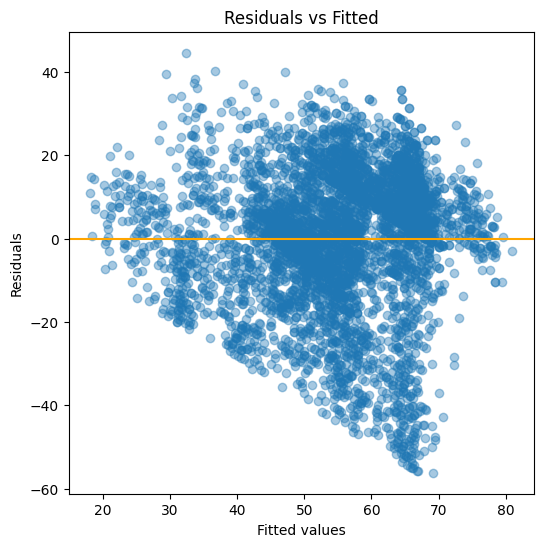

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# ËÆÄË≥áÊñô
high = pd.read_csv("high_popularity_spotify_data.csv")
low  = pd.read_csv("low_popularity_spotify_data.csv")
df   = pd.concat([high, low], ignore_index=True)

df['playlist_genre'] = df['playlist_genre'].replace('hip-hop', 'hiphop')
df['playlist_genre'] = df['playlist_genre'].replace('j-pop', 'jpop')
df['playlist_genre'] = df['playlist_genre'].replace('k-pop', 'kpop')
df['playlist_genre'] = df['playlist_genre'].replace('r&b', 'r8b')

# 1. Âêà‰Ωµ rare genres ÁÇ∫ "ÂÖ∂‰ªñ"
threshold = 0  # Â∞ëÊñº 50 ÂâáË¶ñÁÇ∫ rare
vc = df['playlist_genre'].value_counts()
rare = vc[vc < threshold].index
df['playlist_genre_clean'] = df['playlist_genre'].replace(rare, 'other')
# df.columns = df.columns.str.replace('r&b', 'r8b')


# 2. ÊïòËø∞ÊÄßÁµ±Ë®à & Ë¶ñË¶∫Âåñ
# 2.1 ÁõÆÊ®ôÂàÜÂ∏É
plt.figure(figsize=(6,4))
sns.histplot(df['track_popularity'], bins=30, kde=True)
plt.title("Distribution of track_popularity")
plt.show()

# 2.2 clean genre Ê¨°Êï∏
plt.figure(figsize=(8,4))
sns.barplot(x=vc.index, y=vc.values)
plt.xticks(rotation=90)
plt.title("Original genre counts")
plt.show()

plt.figure(figsize=(8,4))
sns.countplot(data=df, x='playlist_genre_clean',
              order=df['playlist_genre_clean'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Collapsed genre counts")
plt.show()

# 2.3 Êï∏ÂÄºËÆäÊï∏Áõ∏Èóú‰øÇÊï∏ÁÜ±Âúñ
num_cols = ['danceability','energy','valence','tempo','loudness',
            'speechiness','acousticness','instrumentalness','liveness','duration_ms']
corr = df[num_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="vlag", center=0)
plt.title("Numeric Feature Correlation")
plt.show()

# 3. Dummy encoding
genre_dummies = pd.get_dummies(df['playlist_genre_clean'],
                               prefix='genre', drop_first=True).astype(int)

# 4. Âª∫Á´ã modeling dataframe
#    Èô§Âéª‰∏çÂøÖË¶ÅÁöÑ raw Ê¨Ñ‰Ωç
drop_cols = ['track_artist','time_signature','track_href','uri','track_album_name',
             'playlist_name','analysis_url','track_id','track_name',
             'track_album_release_date','track_album_id','id',
             'playlist_subgenre','type','playlist_id','playlist_genre']
df2 = df.drop(columns=drop_cols + ['playlist_genre'])

# Âêà‰Ωµ dummy
df_model = pd.concat([df2, genre_dummies], axis=1)

# 5. ÂÖ±Á∑öÊÄßÊ™¢Êü•ÔºöÁÆó VIF ‰∏¶ÂàóÂá∫Ââç 10 È´ò
'''
X = df_model.drop(columns=['track_popularity'])
X = sm.add_constant(X)
vif = pd.DataFrame({
    'variable': X.columns,
    'VIF': [variance_inflation_factor(X.values, i)
            for i in range(X.shape[1])]
})
vif = vif.sort_values('VIF', ascending=False).head(10)
print("Top 10 VIF:")
print(vif)
'''

# ÂÅáËÆæ X_raw ÊòØ‰Ω†ÂéüÂßãÁöÑËá™ÂèòÈáè DataFrame
# Âè™‰øùÁïôÊï∞ÂÄºÂûã
X = df_model.drop(columns=['track_popularity'])
X = sm.add_constant(X) # Êà™Ë∑ùÈ†Ö
X_num = X.select_dtypes(include=[np.number]).copy()

# Â¶ÇÊûúËøòÊúâ NaN/infÔºåË¶ÅÂÖà‰∏¢ÊéâÊàñÂ°´Ë°•
X_num = X_num.replace([np.inf, -np.inf], np.nan).dropna()

# ÁÑ∂ÂêéÂÜçÁÆó VIF
vif = pd.DataFrame({
    'variable': X_num.columns,
    'VIF': [variance_inflation_factor(X_num.values, i)
            for i in range(X_num.shape[1])]
})
print(vif)

# ÔºàË¶ñÈúÄË¶ÅËá™Ë°å drop VIF ÈÅéÈ´òÁöÑÊ¨Ñ‰ΩçÔºâ

# 6. OLS + backward stepwiseÔºàÁ§∫ÊÑèÔºâ
response = 'track_popularity'
predictors = [c for c in df_model.columns if c != response]
formula = response + " ~ " + " + ".join(predictors)
model = smf.ols(formula, data=df_model).fit()

print(model.summary())

# 7. ÊÆòÂ∑ÆÂúñÊ™¢Êü•
resid = model.resid
fitted = model.fittedvalues

plt.figure(figsize=(6,6))
plt.scatter(fitted, resid, alpha=0.4)
plt.axhline(0, color='orange')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()

# 8. QQ-plot for normality
sm.qqplot(resid, line='45', fit=True)
plt.title("QQ-plot of Residuals")
plt.show()


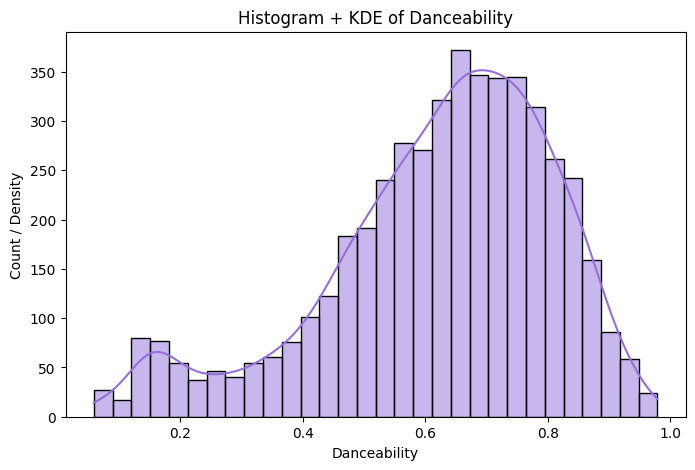

In [14]:
plt.figure(figsize=(8, 5))
sns.histplot(df['danceability'], bins=30, kde=True, color='mediumpurple')
plt.title("Histogram + KDE of Danceability")
plt.xlabel("Danceability")
plt.ylabel("Count / Density")
plt.show()


In [15]:
plt.figure(figsize=(8, 2))
sns.boxplot(x=df['danceability'], color='lightgreen')
plt.title("Boxplot of Danceability")
plt.xlabel("Danceability")
plt.show()
